# Create edgelist for network analysis of co-occuring words in newspaper titles 

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import itertools
import unicodedata
from janome.tokenizer import Tokenizer
import networkx as nx
from scipy.spatial import distance
%matplotlib inline
import matplotlib.pyplot as plt
from itertools import combinations
from collections import defaultdict
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import spacy
en = spacy.load('en_core_web_sm')
#save a sample of list
from random import sample
#define stopwords

In [3]:
data = pd.read_csv('preprocessed.csv', encoding='utf-8')
data

NameError: name 'pd' is not defined

In [343]:
#get a sample 
df2 = data.sample(frac=0.01, replace=True, random_state=1)

In [380]:
stopwords = en.Defaults.stop_words
nlp.Defaults.stop_words.add('advertisement') 

In [381]:
print(nlp.Defaults.stop_words)

{'whereafter', 'anything', 'ten', 'latterly', 'beforehand', 'whether', 'such', 'until', '’ve', 'well', 'either', 'although', 'former', 'where', 'should', 'with', 'own', 'and', 'again', 'quite', 'could', 'their', 'around', 'out', 'doing', '’ll', 'those', 'front', 'be', 'amount', 'down', 'one', 'each', 'moreover', 'most', 'were', 'amongst', 'cannot', 'hence', 'eleven', 'eight', 'below', 'sometime', 'too', 'yourself', 'seemed', 'please', 'between', 'three', 'indeed', 'also', 'into', 'now', 'among', 'this', 'what', 'nowhere', 'except', 'himself', 'still', 'done', 'the', 'together', 'on', 'get', 'yours', 'besides', 'always', 'further', 'to', 're', 'is', 'ever', 'that', 'whereby', 'whole', 'he', 'however', 'am', 'last', 'up', 'very', 'beside', 'many', 'have', 'none', 'something', 'really', 'toward', 'beyond', 'take', 'does', 'put', 'someone', 'why', '‘ve', 'anyone', 'alone', 'wherein', 'using', 'may', 'for', 'first', 'no', 'itself', 'than', 'even', 'thru', 'everywhere', 'has', 'hereupon', '’

In [382]:
def preprocessing(corpus):
    # initialize
    clean_text = []

    for row in corpus:
        tokens =nlp(''.join(str(row)))
        tokens = [clean_url(row) for row in corpus]
        #word tokenize
        tokens = word_tokenize(row)
        #lowercase
        tokens = [token.lower() for token in tokens]
        # isword
        tokens = [token for token in tokens if token.isalpha()]
        #remove stopwords
        tokens = [word for word in tokens if not word in stopwords]
        clean_sentence = ''
        clean_sentence = ' '.join(token for token in tokens)
        clean_text.append(clean_sentence)
        
    return clean_text
 

In [401]:
data['clean_text'] = preprocessing(data.astype(str)['maintext'])

KeyboardInterrupt: 

In [ ]:
for row in data['clean_text']:
    docs = nlp(row)

In [ ]:
docs.ents

#remove stopwords

#text_tokens = word_tokenize(
#tokens_without_sw = [word for word in text_tokens if not word in all_stopwords]
#df2['clean_text'] = df2['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

### Create edge list from titles for igraph

In [2]:
texts = data.clean_title.to_list()
#from nltk.tokenize import word_tokenize
tokenized = [word_tokenize(e) for e in texts]

NameError: name 'data' is not defined

In [48]:
edgelist = defaultdict(int)
for text in tokenized:
    for node1, node2 in combinations(text,2):
        edgelist[(node1,node2)]+=1

#### Save edgelist as .txt file

In [1]:
#for k, v in edgelist.items():
    #print(f"{k[0]},{k[1]},{v}")

with open("edgelist.txt", mode='w') as f:
    for k, v in edgelist.items():
        f.write(f"{k[0]},{k[1]},{v}\n")

NameError: name 'edgelist' is not defined

In [297]:
filtered = {k: v for k, v in edgelist.items() if v > 30}

In [298]:
sorted_d = sorted(filtered.items(), key=operator.itemgetter(1), reverse = True)
#sorted_d

In [299]:
len(filtered)

64

In [249]:
with open("edgelist_2.txt", mode='w') as f:
    for k, v in filtered.items():
        f.write(f"{k[0]},{k[1]},{v}\n")

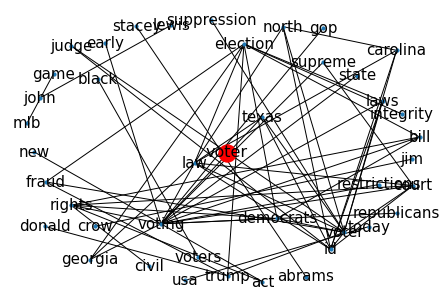

In [302]:
import networkx as nx
import matplotlib.pyplot as plt
import operator

filtered = {k: v for k, v in edgelist.items() if v > 5} #retain only edges that co-occured at least 10 times 
#len(filtered)
#sort edgeweights
sorted_d = sorted(filtered.items(), key=operator.itemgetter(1), reverse = True)
#filter low weighted edges

#create graph object
G = nx.read_weighted_edgelist('edgelist_2.txt', delimiter=',')
#G.edges.data()
G.remove_nodes_from(list(nx.isolates(G)))
#draw graph
nx.draw(G, pos=nx.spring_layout(G, k=5, iterations=20), node_size = 10, with_labels = True, font_size = 15, font_family='sans-serif')
# draw subgraph for highlights
nx.draw_networkx(G.subgraph('voter'), pos=pos, font_size=16, node_color='red', font_color='black')

In [231]:
#write as graphml file so that igraph can open it
nx.write_graphml(G,'graph.graphml')

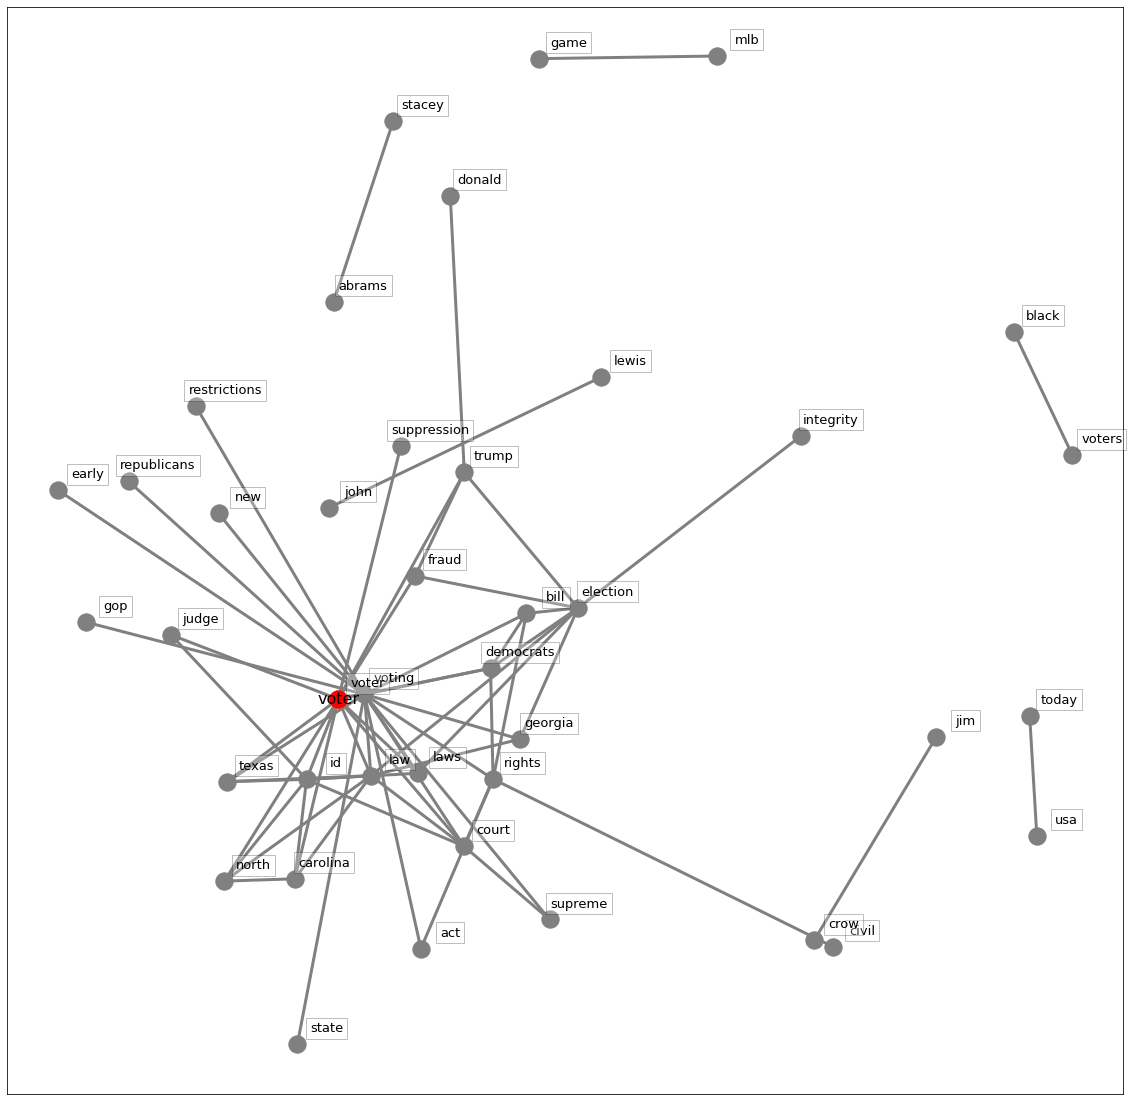

In [405]:
fig, ax = plt.subplots(figsize=(20, 20))
pos = nx.spring_layout(G, k=2)
edges = G.edges()
weights = nx.get_edge_attributes(G, “weight”)
scaling_factor = 0.04 # to emphasise differences
alphas = [weights[edge] * scaling_factor for edge in edges]

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width = alphas,
                 edge_color=‘grey’,
                 node_color=‘grey’,
                 with_labels = False,
                 ax=ax, alpha = 0.5)
nx.draw_networkx(G.subgraph(‘id’),
                 pos=pos,
                 font_size=16,
                 node_color=‘red’,
                 font_color=‘black’,
                ax =ax, alpha = 0.5)
nx.draw_networkx(G.subgraph(‘voter’),
                 pos=pos,
                 font_size=16,
                 node_color=‘blue’,
                 font_color=‘black’,
                ax =ax, alpha = 0.5)
# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.10, value[1]+.020
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor=‘white’, alpha=0.25),
            horizontalalignment=‘center’, fontsize=13)
plt.tight_layout()
plt.show()